# Support Vector Machines 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

In [2]:
df = sns.load_dataset("iris")

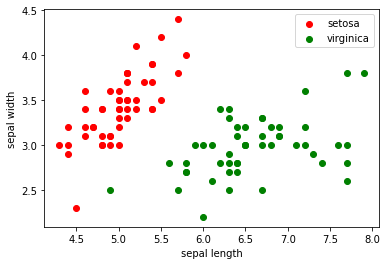

In [3]:
df1 = df[df.species=="setosa"]
#df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.scatter(df1.sepal_length, df1.sepal_width, color="red", label ="setosa")
#plt.scatter(df2.sepal_length, df2.sepal_width, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.sepal_width, color="green", label="virginica")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend();

In [4]:
df_sv = pd.concat([df1, df3])
df_sv

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
X = df_sv[["sepal_length", "sepal_width"]]
y = df_sv["species"]

In [7]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [10]:
model = SVC(kernel="linear", C=1000)
model.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='linear')

In [11]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

1.0

In [12]:
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

1.0

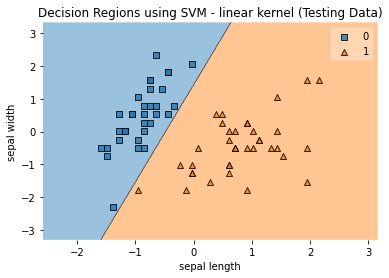

In [13]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Testing Data)');

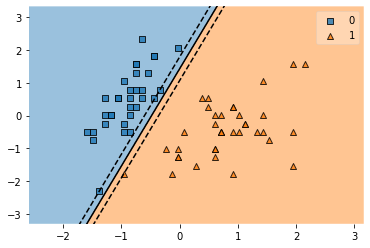

In [14]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

In [15]:
model.support_vectors_

array([[-0.33596747,  0.78719042],
       [-1.37657467, -2.30271591],
       [-0.96033179, -1.78773152]])

In [16]:
model = SVC(kernel="linear", C=10)
model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [17]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9857142857142858

In [18]:
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

1.0

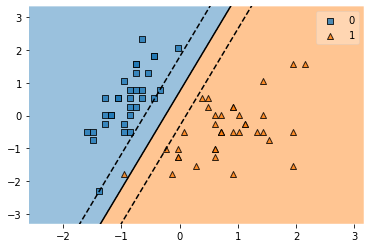

In [19]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

In [20]:
X = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [21]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [24]:
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7904761904761904

In [26]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7333333333333333

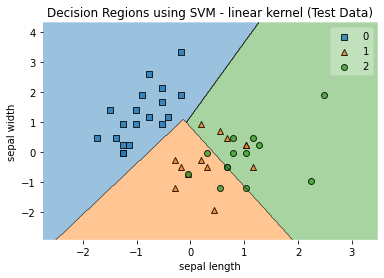

In [27]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Test Data)');

In [28]:
model = SVC(kernel="poly", degree=3)
model.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [29]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7714285714285715

In [30]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7555555555555555

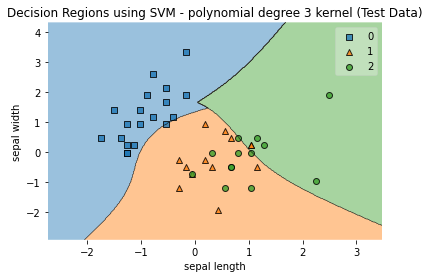

In [31]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - polynomial degree 3 kernel (Test Data)');

In [32]:
model = SVC(kernel="rbf", gamma=0.1)
model.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

In [33]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7904761904761904

In [34]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7333333333333333

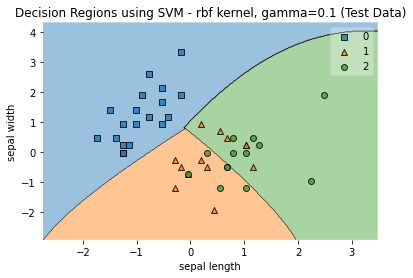

In [35]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=0.1 (Test Data)');

In [36]:
model = SVC(kernel="rbf", gamma=100)
model.fit(X_train_scaled, y_train)

SVC(gamma=100)

In [37]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9619047619047619

In [38]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5555555555555556

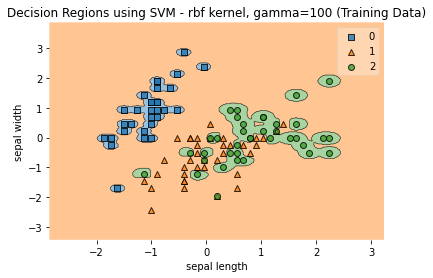

In [39]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=100 (Training Data)');

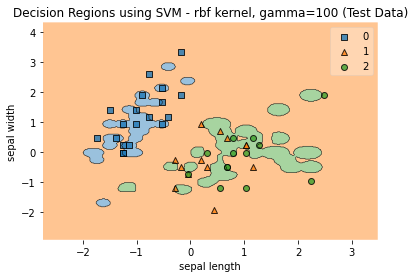

In [40]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=100 (Test Data)');

### Homework - 7



### Part 1: Watch Prof. Abu-Mostafa’s Lectures [4] and explain what margin and non-margin support vectors are.

### Here is the Answer:


##### Generally, In Support Vector Machines (SVM), support vectors are the data points that are closer to the hyperplane and are crucial for defining the optimal separating boundary.


#### Margin Support Vectors: 
 
##### The data points that lie exactly on the dotted lines making decision boundary are margin support vectors.

#### Non-Margin Support Vectors: 
 
##### The data points that lie within the soft-margin SVM that lie inside the margin boundaries but not on margin boundary or on the wrong side of the decision boundary.


#### Hard Margin SVM: 
##### Only has margin support vectors lying exactly on the margin; any point inside the margin or violating the margin would make a hard margin infeasible.

#### Soft Margin SVM: 
##### Has both margin and non-margin support vectors due to the allowance for margin violations, providing flexibility for non-linearly separable data.







### Part 2: Create a binary classification problem using sklearn.datasets.make moons. Build a SVM   classifier model and investigate the effect of hyper-parameters C, γ , and kernels on the model performance.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC #imported support vector classification

from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_moons #made use of moons dataset

In [5]:
X, y = make_moons()
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['label'] = y
df

,feature1,feature2,label
0,1.000000,0.000000e+00,0
1,0.967948,-4.994862e-01,1
2,-0.718349,6.956826e-01,0
3,-0.159600,9.871818e-01,0
4,1.718349,-1.956826e-01,1
...,...,...,...
95,1.997945,4.359298e-01,1
96,0.967295,2.536546e-01,0
97,0.159600,9.871818e-01,0
98,0.000000,5.000000e-01,1


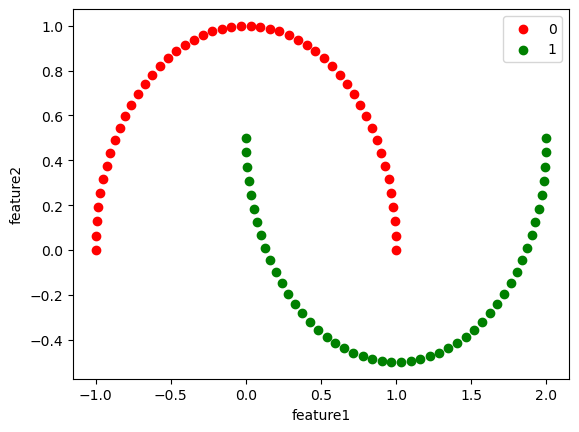

In [7]:
df1 = df[df.label == 0]
df2 = df[df.label == 1]

plt.scatter(df1.feature1, df1.feature2, color='red', label=0)
plt.scatter(df2.feature1, df2.feature2, color='green', label=1)

plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend();

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
def plot(model, X, y, title):
    # Set up the plot
    ax = plt.gca()

    # Create a mesh grid for plotting the decision boundary and margins
    xx = np.linspace(-4, 4, 30)
    yy = np.linspace(-4, 4, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Calculate the decision function for each point in the mesh grid
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # Plot data points and decision regions
    plot_decision_regions(X, y, clf=model, legend=2)  # `clf` refers to the model parameter in mlxtend
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title(title)
    plt.show()

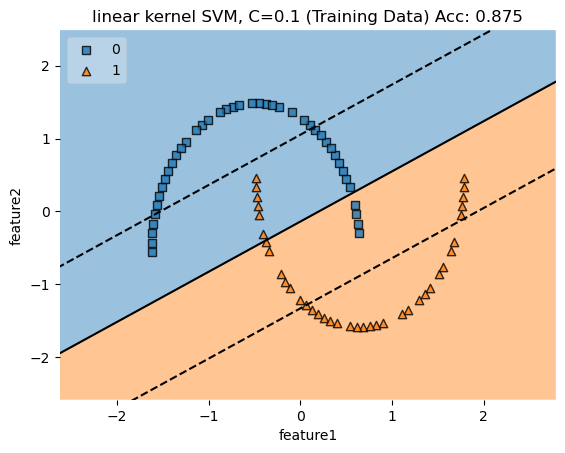

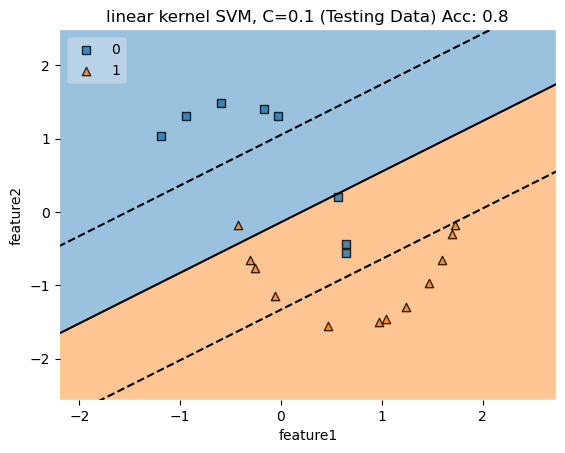

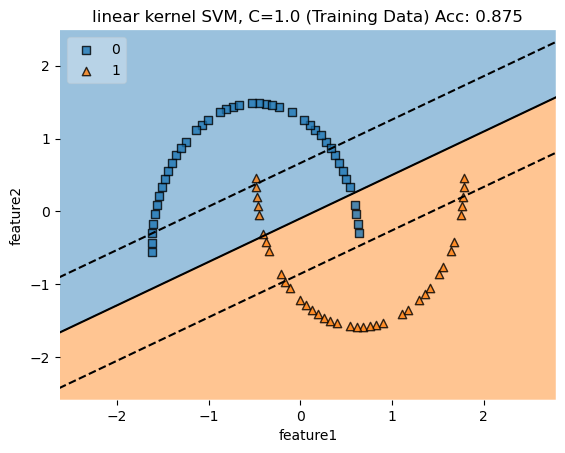

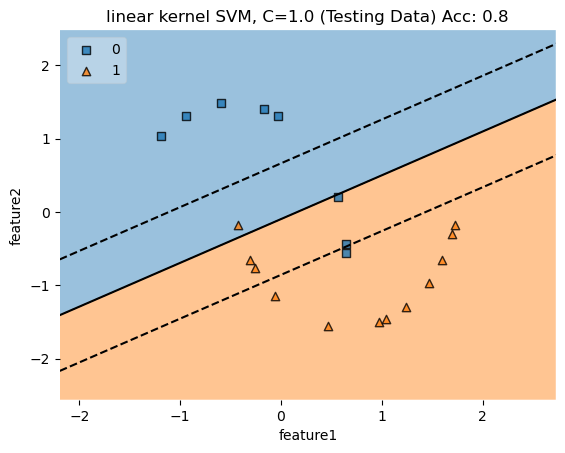

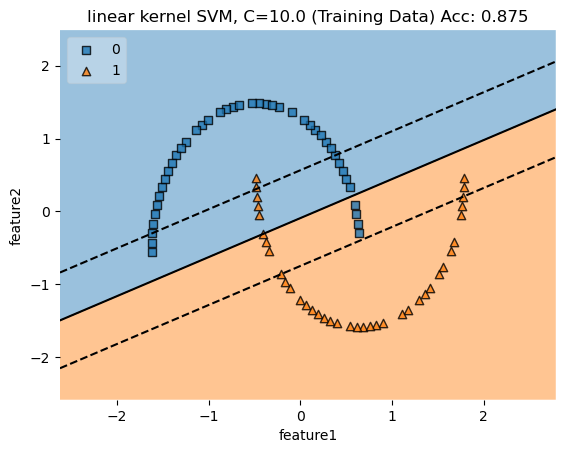

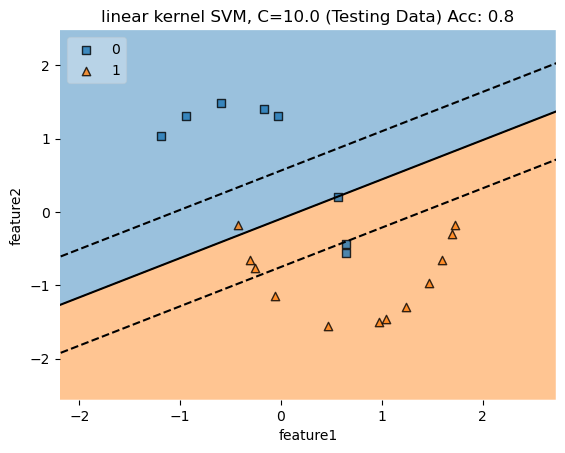

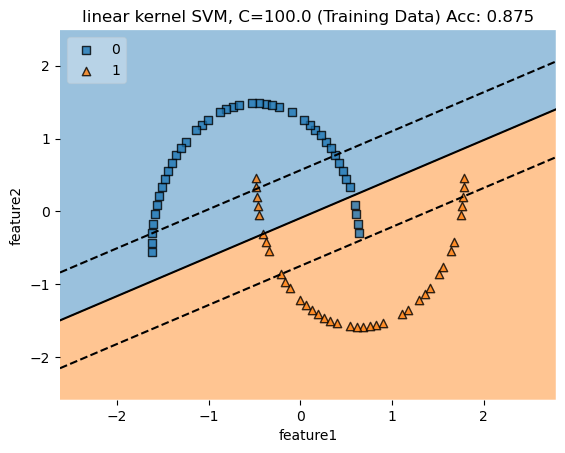

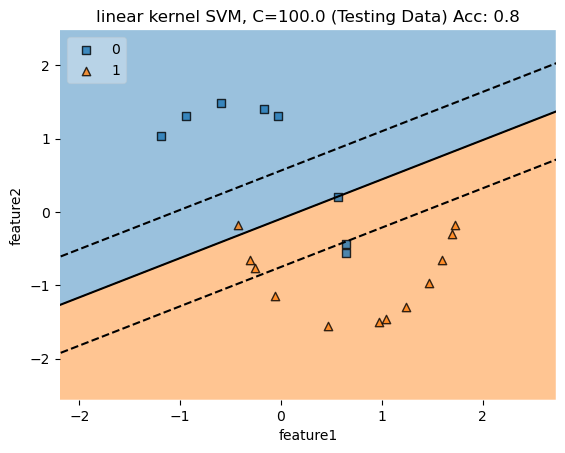

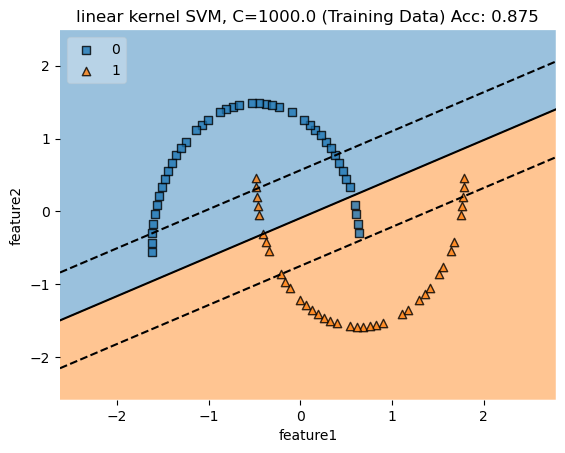

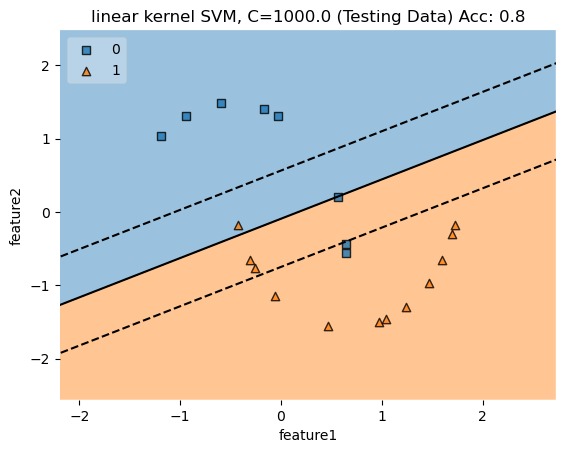

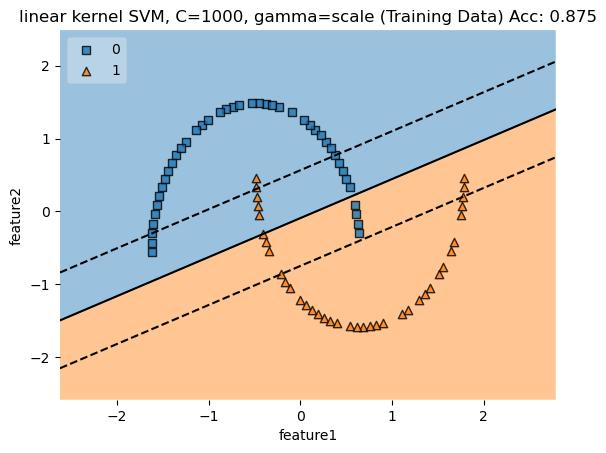

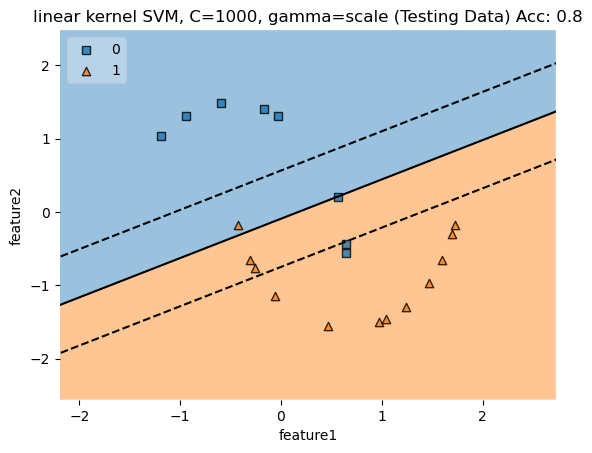

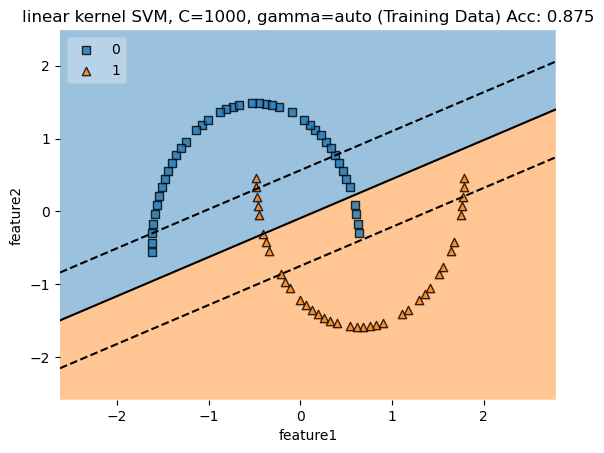

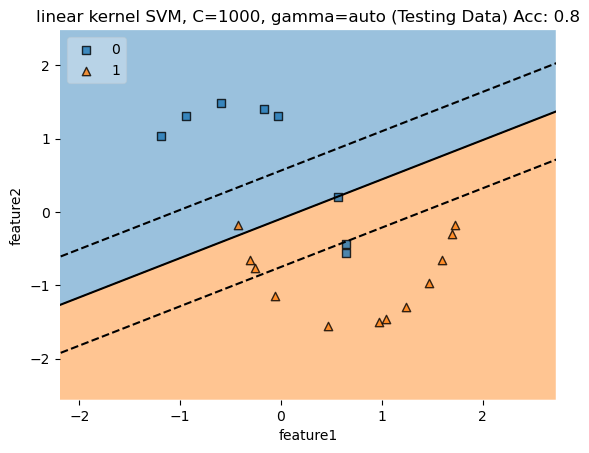

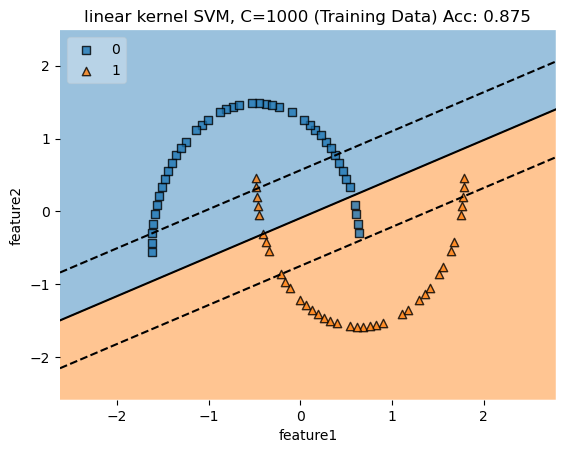

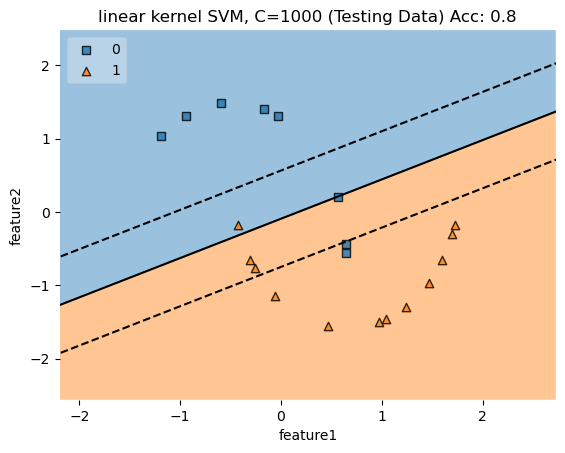

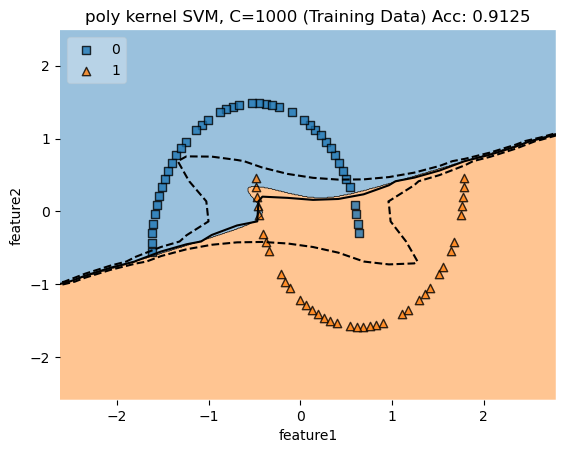

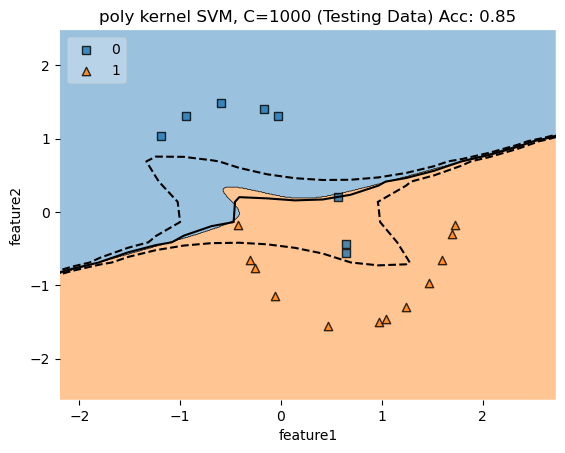

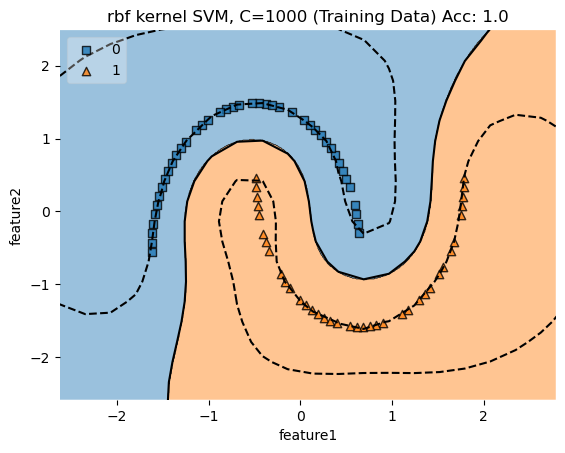

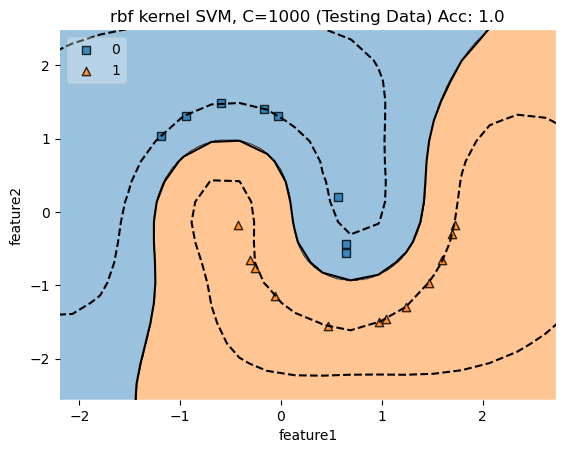

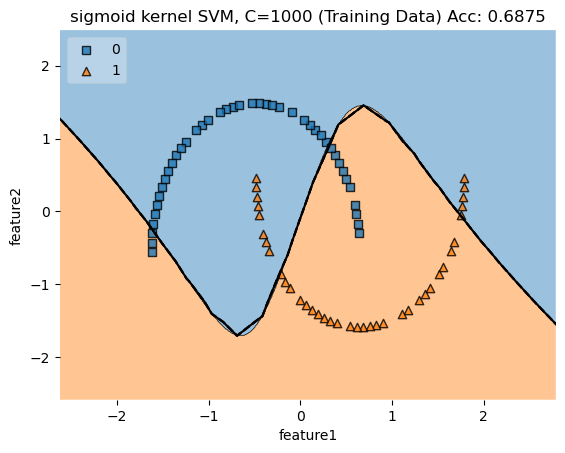

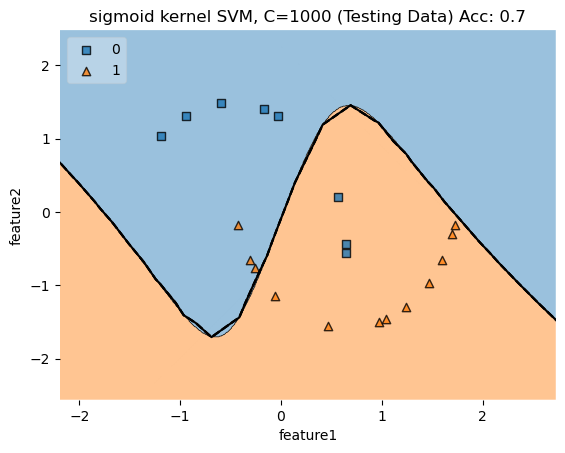

In [13]:
# Loop over different values of the regularization parameter C (from 0.1 to 1000)
for C in np.logspace(-1, 3, 5):
    # Create and train an SVM model with a linear kernel and current value of C
    model = SVC(kernel='linear', C=C).fit(X_train_scaled, y_train)
    
    # Calculate accuracy on training and testing data
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    
    # Plot the decision boundary and margin for the training data with accuracy in title
    plot(model, X_train_scaled, y_train, f'linear kernel SVM, C={C} (Training Data) Acc: {train_acc}')
    
    # Plot the decision boundary and margin for the testing data with accuracy in title
    plot(model, X_test_scaled, y_test, f'linear kernel SVM, C={C} (Testing Data) Acc: {test_acc}')
    

# Loop over different gamma values to test with a linear kernel (though gamma is usually for non-linear kernels)
for gamma in ['scale', 'auto']:
    # Create and train an SVM model with a linear kernel, high C value, and current gamma setting
    model = SVC(kernel='linear', C=1000, gamma=gamma).fit(X_train_scaled, y_train)
    
    # Calculate accuracy on training and testing data
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    
    # Plot the decision boundary and margin for training data with accuracy in title
    plot(model, X_train_scaled, y_train, f'linear kernel SVM, C=1000, gamma={gamma} (Training Data) Acc: {train_acc}')
    
    # Plot the decision boundary and margin for testing data with accuracy in title
    plot(model, X_test_scaled, y_test, f'linear kernel SVM, C=1000, gamma={gamma} (Testing Data) Acc: {test_acc}')
    

# Loop over different kernel types to compare performance with a high C value
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    # Create and train an SVM model with current kernel and high C value
    model = SVC(kernel=kernel, C=1000).fit(X_train_scaled, y_train)
    
    # Calculate accuracy on training and testing data
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    
    # Plot the decision boundary and margin for training data with accuracy in title
    plot(model, X_train_scaled, y_train, f'{kernel} kernel SVM, C=1000 (Training Data) Acc: {train_acc}')
    
    # Plot the decision boundary and margin for testing data with accuracy in title
    plot(model, X_test_scaled, y_test, f'{kernel} kernel SVM, C=1000 (Testing Data) Acc: {test_acc}')


In [46]:
#made use of grid serach to get the optimal one
gs_model = GridSearchCV(SVC(), {
    'C': np.logspace(-1, 3, 5),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}, cv=5, scoring='accuracy').fit(X_train_scaled, y_train)
model = gs_model.best_estimator_
model

SVC(C=10.0)

Best Params: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


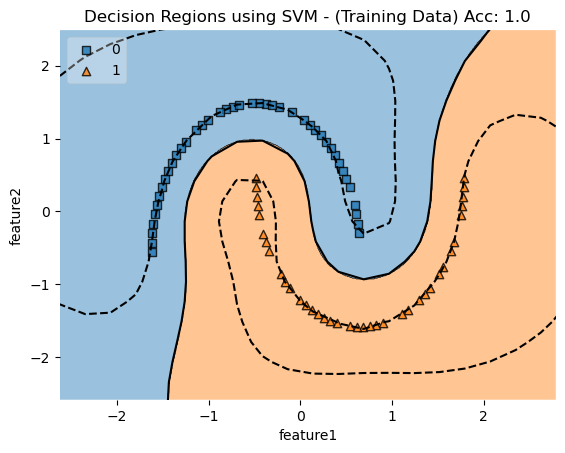

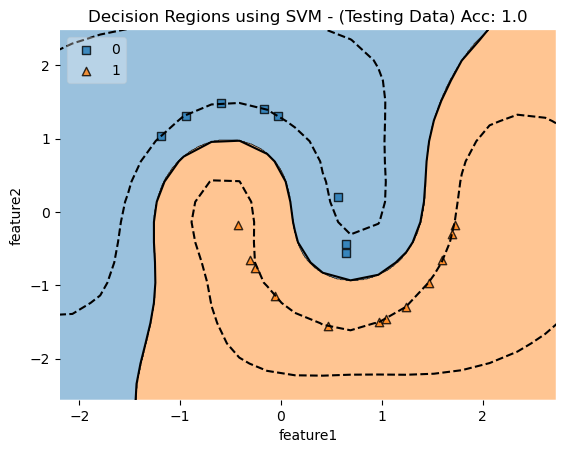

Support Vectors:
[[-0.73917573  1.43869815]
 [ 0.63900747 -0.29954176]
 [ 0.16269886  1.12112278]
 [-0.80955023  1.40533075]
 [-1.35082912  0.76827535]
 [-1.62157623 -0.56195955]
 [-1.30191659  0.86565642]
 [ 0.22100484  1.04244336]
 [ 0.90087571 -1.53656308]
 [ 0.82946343 -1.56170935]
 [ 1.51252911 -0.86614028]
 [ 1.78327621  0.46409462]
 [-0.48662541  0.46409462]
 [ 1.55789044 -0.76329299]
 [-0.11470304 -1.05503603]]


In [50]:
print(f'Best Params: {gs_model.best_params_}')

train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
test_acc = accuracy_score(y_test, model.predict(X_test_scaled))

plot(model, X_train_scaled, y_train, f'Decision Regions using SVM - (Training Data) Acc: {train_acc}')
plot(model, X_test_scaled, y_test, f'Decision Regions using SVM - (Testing Data) Acc: {test_acc}')

print(f'Support Vectors:\n{model.support_vectors_}')